In [1]:
import random
import matplotlib.pylab as plt
import numpy as np
import webcolors
%matplotlib inline

In [2]:
data = np.load("data.npz")

In [3]:
x = data['x']
y = data['y']

In [4]:
print(x.shape)
print(y.shape)

(80, 1024, 1280, 3)
(80, 1024, 1280)


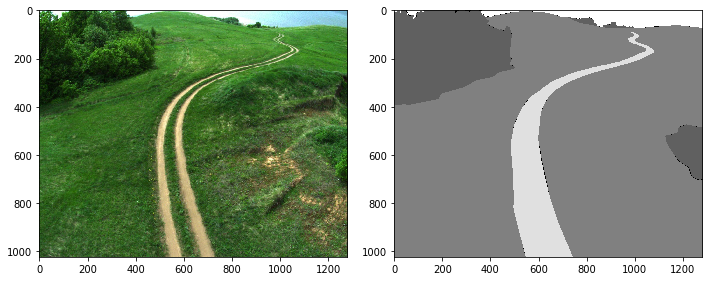

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(x[0])
axes[1].imshow(y[0], cmap='gray')
fig.tight_layout()

In [6]:
import pandas as pd
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [111]:
# Function to distort image
# Taken from: https://www.kaggle.com/bguberfain/elastic-transform-for-data-augmentation
def elastic_transform_image(image, mask, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dx, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))
    image_et = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    
    dx = dx[...,0]
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dx, (-1, 1)), np.reshape(x+dx, (-1, 1))
    mask_et = map_coordinates(mask, indices, order=1, mode='reflect').reshape(shape)
    
    return image_et, mask_et

In [105]:
image = img
mask = msk

alpha = img.shape[1] * 3
sigma = img.shape[1] * 0.07
alpha_affine = img.shape[1] * 0.09
random_state = np.random.RandomState(0)

shape = image.shape
shape_size = shape[:2]

# Random affine
center_square = np.float32(shape_size) // 2
square_size = min(shape_size) // 3
pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
M = cv2.getAffineTransform(pts1, pts2)
image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
indices = np.reshape(y+dx, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))
image_et = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

shape = mask.shape
shape_size = shape[:2]

dx2 = dx[...,0]

x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
indices = np.reshape(y+dx2, (-1, 1)), np.reshape(x+dx2, (-1, 1))
mask_et = map_coordinates(mask, indices, order=1, mode='reflect').reshape(shape)

In [109]:
dx2

array([[-10.14190935, -10.14222163, -10.14288328, ...,   2.81022993,
          2.81075762,   2.81057797],
       [-10.13967483, -10.13998714, -10.14064887, ...,   2.81104361,
          2.81157136,   2.81139171],
       [-10.13589686, -10.13620918, -10.13687097, ...,   2.81301438,
          2.81354228,   2.81336268],
       ...,
       [  2.70765259,   2.70724777,   2.70649895, ...,  -3.55126218,
         -3.54980745,  -3.54890642],
       [  2.70756702,   2.70716232,   2.70641369, ...,  -3.55227297,
         -3.55081826,  -3.54991717],
       [  2.70744068,   2.70703602,   2.70628751, ...,  -3.55278409,
         -3.5513293 ,  -3.55042813]])

In [50]:
def elastic_transform_mask(mask, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = mask.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    mask = cv2.warpAffine(mask, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dx, (-1, 1)), np.reshape(x+dx, (-1, 1))

    return map_coordinates(mask, indices, order=1, mode='reflect').reshape(shape)

In [10]:
# Define function to draw a grid
def draw_grid(im, grid_size):
    # Draw grid lines
    for i in range(0, im.shape[1], grid_size):
        cv2.line(im, (i, 0), (i, im.shape[0]), color=(255,), thickness = 5)
    for j in range(0, im.shape[0], grid_size):
        cv2.line(im, (0, j), (im.shape[1], j), color=(255,), thickness = 5)

In [11]:
img = x[0].copy()
draw_grid(img, 100)

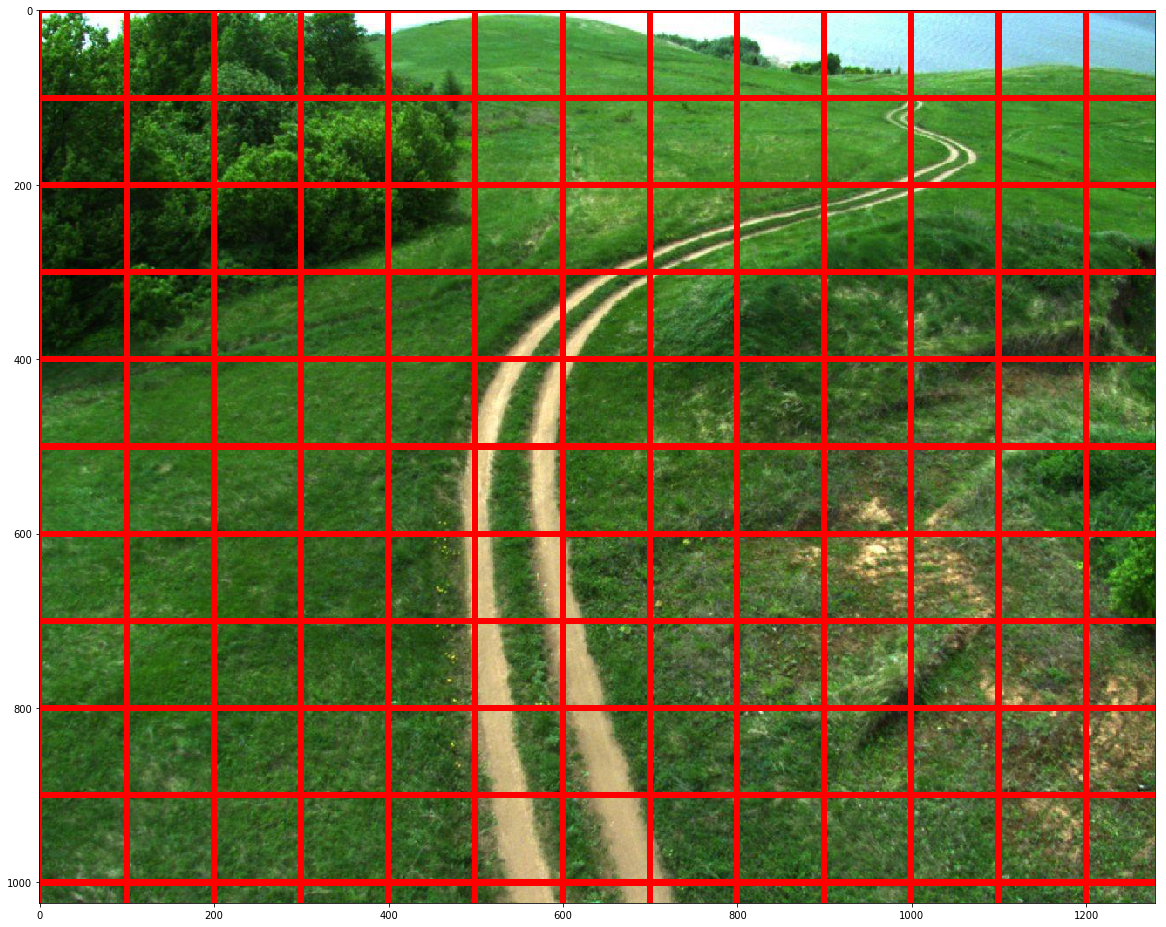

In [12]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(img)

In [115]:
img_et,msk_et = elastic_transform_image(img, msk, img.shape[1] * 3, img.shape[1] * 0.07, img.shape[1] * 0.09)

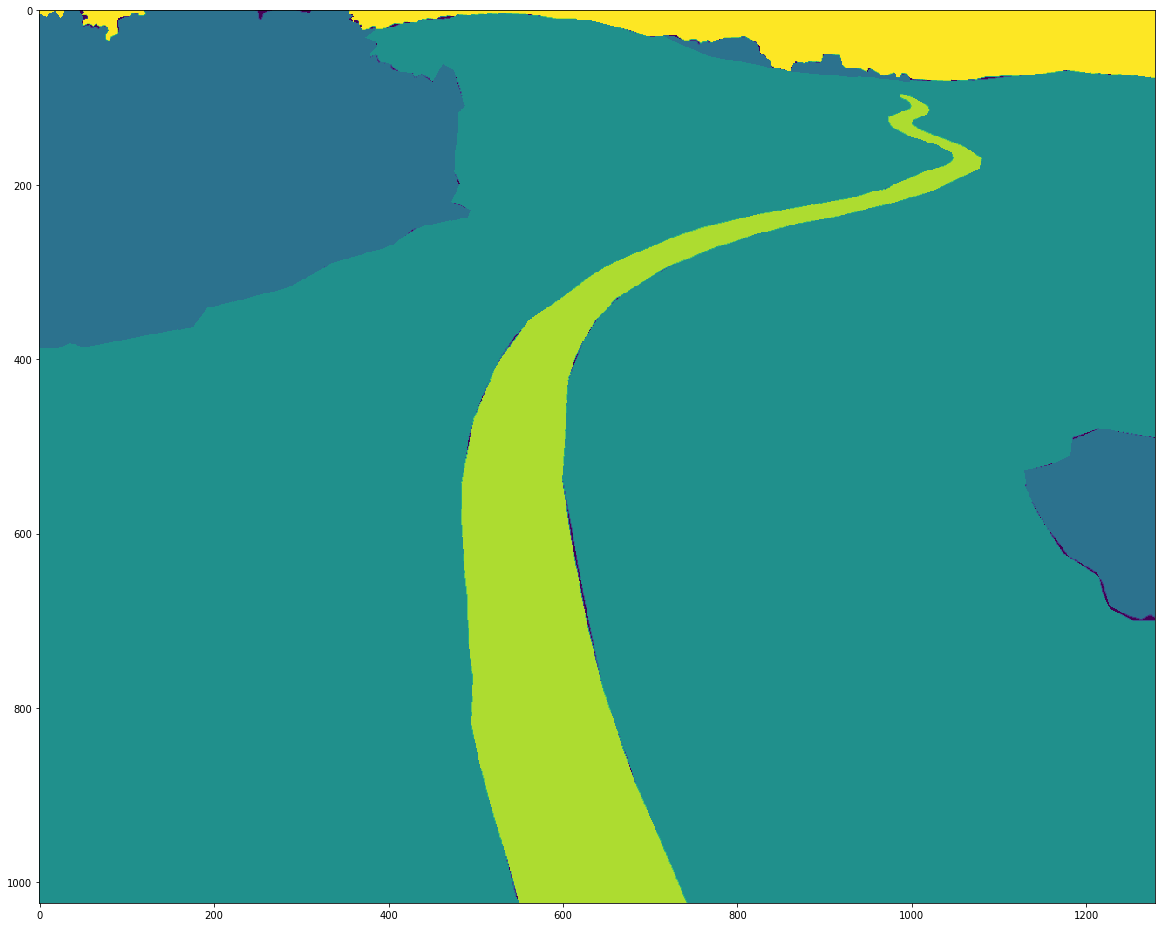

In [117]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(msk_et)

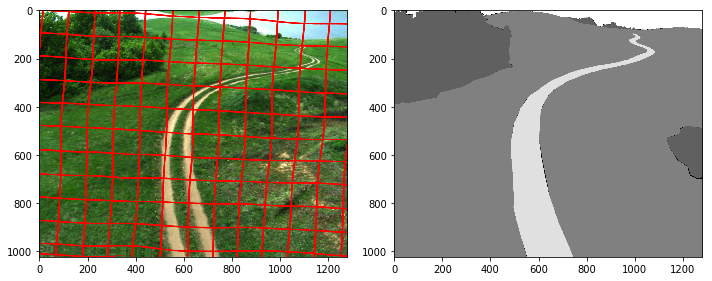

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(img_et)
axes[1].imshow(msk_et, cmap='gray')
fig.tight_layout()

In [16]:
###TODO###
print(len(np.unique(img[...,1])))
print(len(np.unique(img_et[...,1])))

254
256


In [17]:
msk = y[0].copy()
# msk = np.asarray([msk, msk, msk]).swapaxes(0,1).swapaxes(1,2)
msk.shape
# draw_grid(msk, 100)

(1024, 1280)

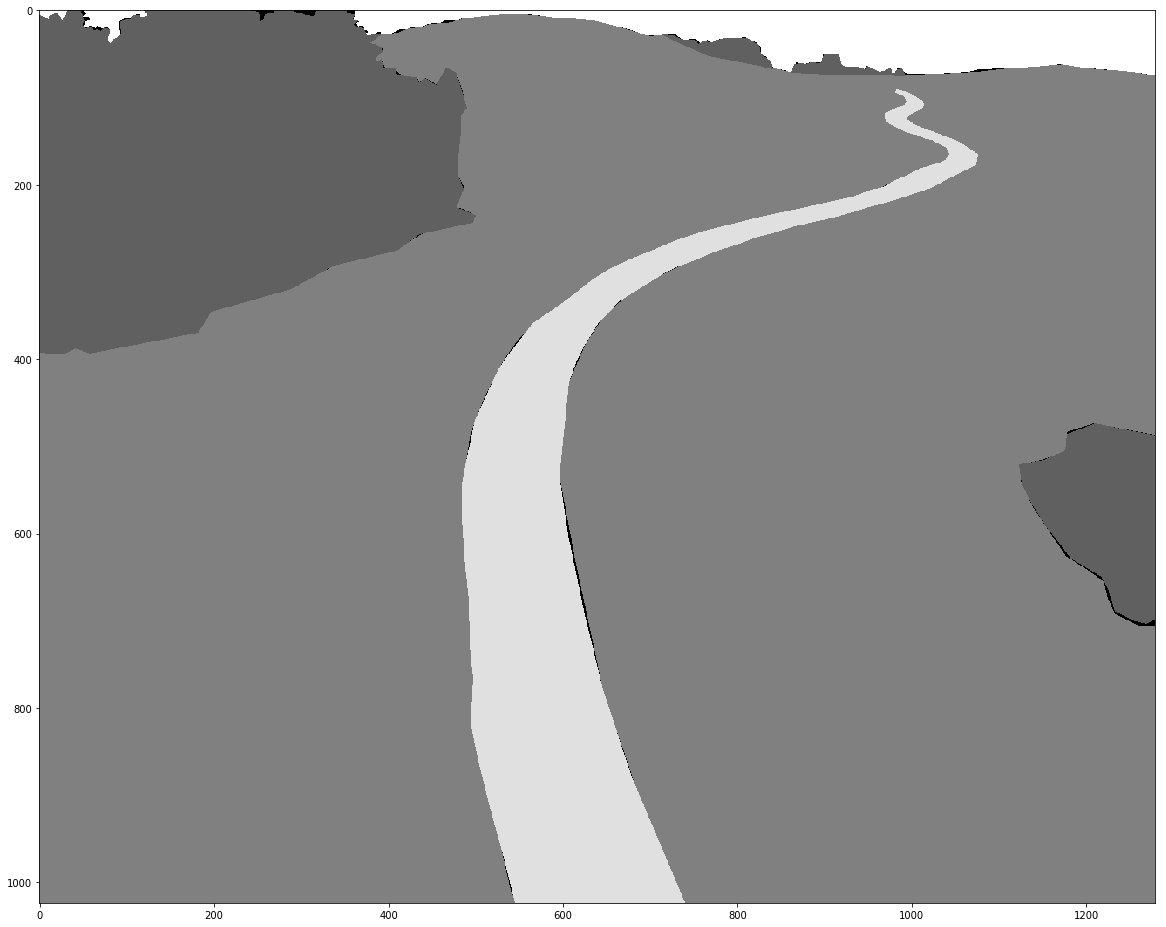

In [18]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(msk, cmap='gray')

In [ ]:
kek = np.asarray([msk, msk, msk]).swapaxes(0,1).swapaxes(1,2)
kek.dtype

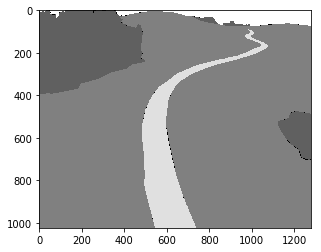

In [19]:
plt.imshow(y[0],cmap='gray')

In [31]:
msk_et = elastic_transform_mask(msk, msk.shape[1] * 3, msk.shape[1] * 0.07, msk.shape[1] * 0.09)

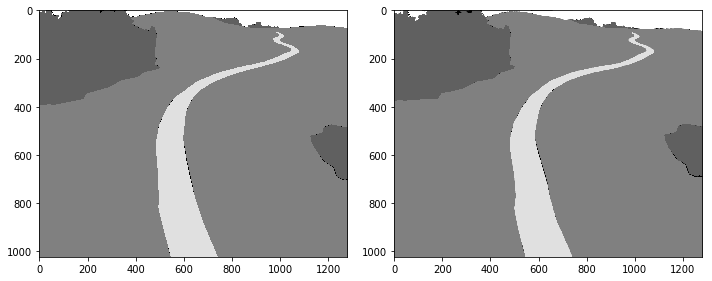

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(msk, cmap='gray')
axes[1].imshow(msk_et, cmap='gray')
fig.tight_layout()

In [21]:
hex_colors = ['#000000','#4A4A4A','#FF0000', '#407700', '#00FF37', '#8B572A', '#0000FF', '#FF7600', '#50E3C2']

rgb_colors = []

for hex_color in hex_colors:
    rgb_colors.append(webcolors.hex_to_rgb(hex_color))
    
def colorize(mask, colors):
    colorMask = np.zeros([mask.shape[0], mask.shape[1], 3],dtype=np.uint8)
    for r in range(mask.shape[0]):
        for c in range(mask.shape[1]):
            colorMask[r,c,] = colors[mask[r,c]]

    return colorMask

In [ ]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(colorize(msk, colors = np.array(rgb_colors)))

In [ ]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(colorize(msk_et, colors = np.array(rgb_colors)))

In [ ]:
###TODO###
print(np.unique(msk))
print(np.unique(msk_et))

In [ ]:
len(img.shape)

In [ ]:
len(msk.shape)

In [ ]:
img_et, msk_et = elastic_transform(img, msk, img.shape[1] * 3, img.shape[1] * 0.07, img.shape[1] * 0.09)

In [ ]:
msk.shape

In [33]:
# msk = y[0].copy()
msk = b
random_state = np.random.RandomState(None)

shape = msk.shape
shape_size = shape[:2]

# Random affine
center_square = np.float32(shape_size) // 2
square_size = min(shape_size) // 3
pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
pts2 = pts1 + random_state.uniform(-0.09, 0.09, size=pts1.shape).astype(np.float32)
M = cv2.getAffineTransform(pts1, pts2)
msk2 = cv2.warpAffine(msk, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

In [32]:
b = msk > 7
print(b.shape)
print(np.unique(b))
print(np.unique(msk2))
b = b.astype('uint8')
b.shape
b

(1024, 1280)
[False  True]
[0 1 3 4 5 6 7 8]


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([0, 1], dtype=uint8)

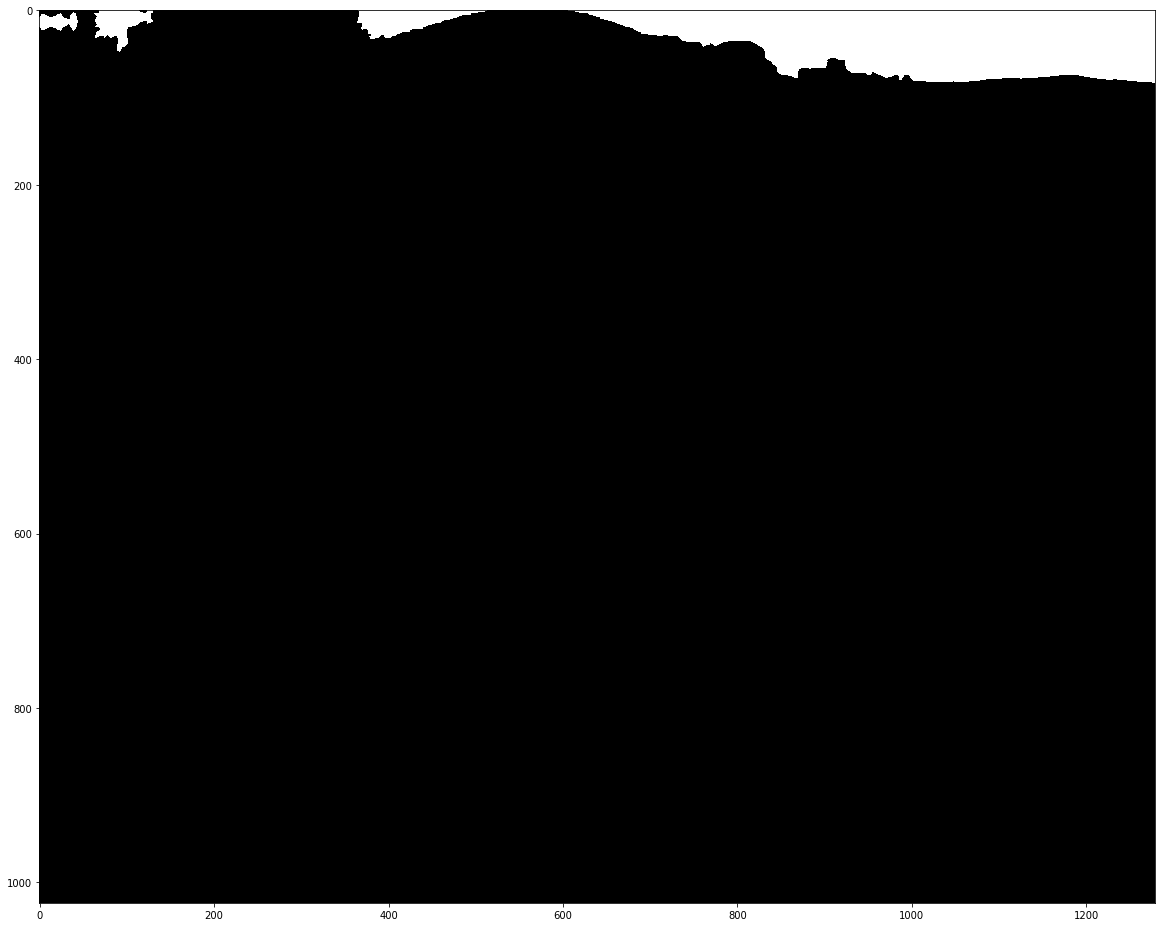

In [45]:
fig,axis = plt.subplots()
fig.set_size_inches(20,20)
axis.imshow(msk_et, cmap='gray')
np.unique(msk_et)

In [42]:
msk_et = elastic_transform_mask(msk, msk.shape[1] * 3, msk.shape[1] * 0.07, msk.shape[1] * 0.09)

In [45]:
shape = img.shape
print(*shape)

1024 1280 3


In [134]:
def one_to_n(mask,n_classes):


    h,w = mask.shape
    masks = np.zeros([h*w,n_classes],dtype='bool_')

    y = mask.copy()
    y = y.reshape([h*w])
    
    for j in range(h*w):
        masks[j,(y[j])] = True
        
    masks = masks.reshape([h,w,n_classes])
    return masks
    

In [135]:
masks = one_to_n(msk,9)

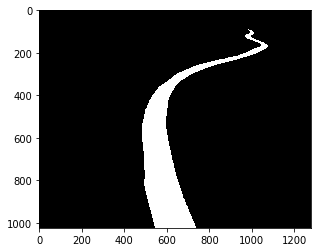

In [148]:
plt.imshow(masks[...,7],cmap='gray')

In [149]:
msk = masks[...,7].copy()

In [150]:
img_et,msk_et = elastic_transform_image(img, msk, img.shape[1] * 3, img.shape[1] * 0.07, img.shape[1] * 0.09)

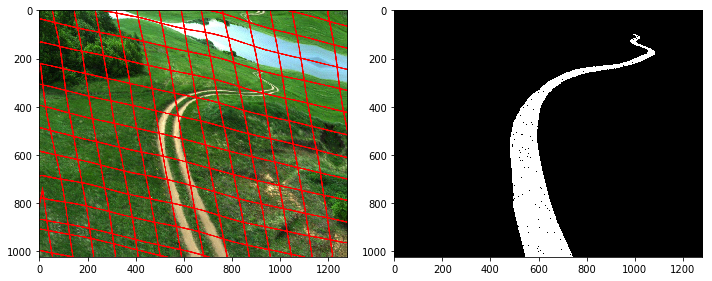

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(img_et)
axes[1].imshow(msk_et, cmap='gray')
fig.tight_layout()